### Imports

In [16]:
import galsim
from matplotlib import pyplot as plt
plt.style.use(['dark_background'])
%matplotlib inline

import numpy as np
from SpecklePSF import SpeckleSeries
import pickle
import pandas as pd

scratchdir = '/global/cscratch1/sd/chebert/'
saveDir = './../Fits/hsmFits/'

# find all image files in the scratch directory
fileNames = ! ls /global/cscratch1/sd/chebert/rawSpeckles/ | grep 'img' 
fileNames = [f for f in fileNames if f not in ['img_a_004.fits', 'img_a_388.fits', 'img_a_389.fits',
                                               'img_b_004.fits', 'img_b_388.fits', 'img_b_389.fits']]

#### load com and fwhm 

In [17]:
with open('./../Fits/centerOfMassB.p', 'rb') as file:
    comDictB = pickle.load(file)
with open('./../Fits/fwhmB.p', 'rb') as file:
    fwhmDictB = pickle.load(file)

with open('./../Fits/centerOfMassA.p', 'rb') as file:
    comDictA = pickle.load(file)
with open('./../Fits/fwhmA.p', 'rb') as file:
    fwhmDictA = pickle.load(file)

#### load all the fits and combine to an object each for g1, a g2, and a HLR

In [21]:
critA, critB, g1_a, g2_b, g1_b, g2_a, hlr_a, hlr_b = {}, {}, {}, {}, {}, {}, {}, {}

for file in fileNames:
    fileNumber = file.split('.')[0].split('_')[-1]
    with open(saveDir + 'hsm_img_a_' + fileNumber + '_cumulative.p', 'rb') as file:
        hsmA = pickle.load(file)
    with open(saveDir + 'hsm_img_b_' + fileNumber + '_cumulative.p', 'rb') as file:
        hsmB = pickle.load(file)

    critA[fileNumber] = comDictA['img_a_' + fileNumber + '.fits'] + fwhmDictA['img_a_' + fileNumber + '.fits']
    critB[fileNumber] = comDictB['img_b_' + fileNumber + '.fits'] + fwhmDictB['img_b_' + fileNumber + '.fits']
    
    g1_a[fileNumber] = hsmA['g1']
    g1_b[fileNumber] = hsmB['g1']
    
    g2_a[fileNumber] = hsmA['g2']
    g2_b[fileNumber] = hsmB['g2']
    
    hlr_a[fileNumber] = hsmA['hlr']
    hlr_b[fileNumber] = hsmB['hlr']


In [22]:
allFits = pd.DataFrame(data={'critA': critA, 
                             'critB': critB, 
                             'g1_a': g1_a, 
                             'g1_b': g1_b, 
                             'g2_a': g2_a, 
                             'g2_b': g2_b, 
                             'hlr_a': hlr_a, 
                             'hlr_b': hlr_b})

### g1

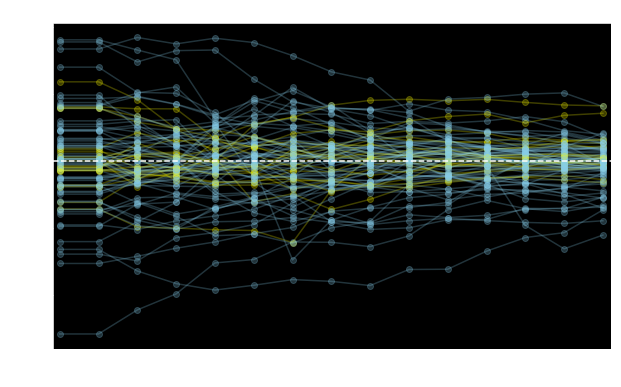

In [144]:
plt.figure(figsize=(10,6))
pts = np.logspace(-1.22,1.79,15)

for fileNumber in allFits.index:
    c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'skyblue'    
    plt.plot(pts, allFits['g1_a'].loc[fileNumber], 'o-', alpha=0.25, color=c)

plt.axhline(0, linestyle='--', color='w')
plt.xlabel('exposure time')
plt.ylabel('g1')
plt.title('filter a: 692 nm')
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.show()

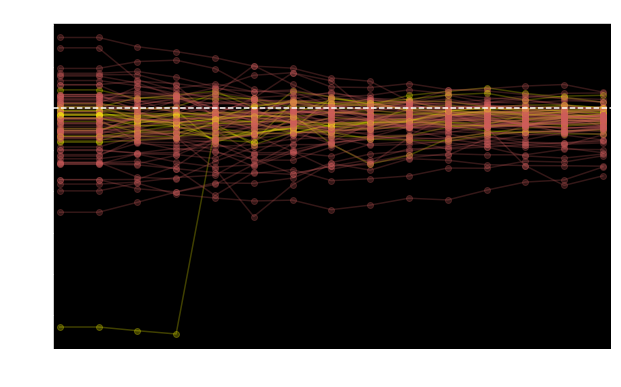

In [145]:
plt.figure(figsize=(10,6))
pts = np.logspace(-1.22,1.79,15)

for fileNumber in allFits.index:
    c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'indianred'    
    plt.plot(pts, allFits['g1_b'].loc[fileNumber], 'o-', alpha=0.25, color=c)

plt.axhline(0, linestyle='--', color='w')
plt.xlabel('exposure time')
plt.ylabel('g1')
plt.title('filter b: 692 nm')
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.show()

0


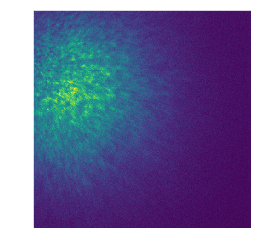

In [126]:
test = SpeckleSeries('017', 'data', scratchdir)
plt.imshow(test.bSeq[0], origin='lower');
crit = 0 if allFits['critA'].loc['017']>=128 or allFits['critB'].loc['017']>=129 else 1
print(crit)

### g2

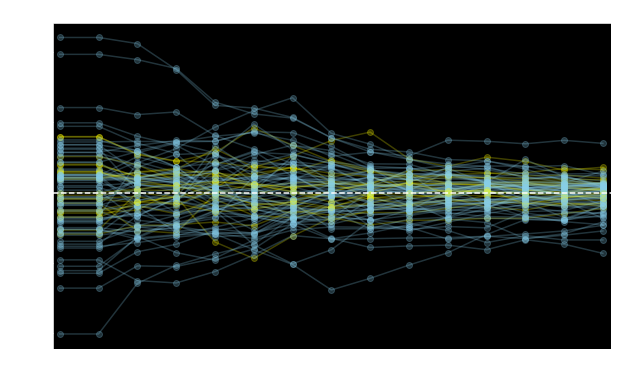

In [146]:
plt.figure(figsize=(10,6))
pts = np.logspace(-1.22,1.79,15)

for fileNumber in allFits.index:
    c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'skyblue'    
    plt.plot(pts, allFits['g2_a'].loc[fileNumber], 'o-', alpha=0.25, color=c)

plt.axhline(0, linestyle='--', color='w')
plt.xlabel('exposure time')
plt.ylabel('g2')
plt.title('filter a: 692 nm')
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.show()

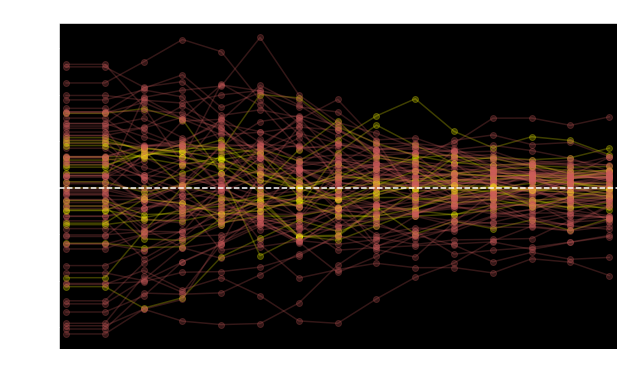

In [147]:
plt.figure(figsize=(10,6))
pts = np.logspace(-1.22,1.79,15)

for fileNumber in allFits.index:
    c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'indianred'    
    plt.plot(pts, allFits['g2_b'].loc[fileNumber], 'o-', alpha=0.25, color=c)

plt.axhline(0, linestyle='--', color='w')
plt.xlabel('exposure time')
plt.ylabel('g2')
plt.title('filter b: 692 nm')
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.show()

### g1 v g2

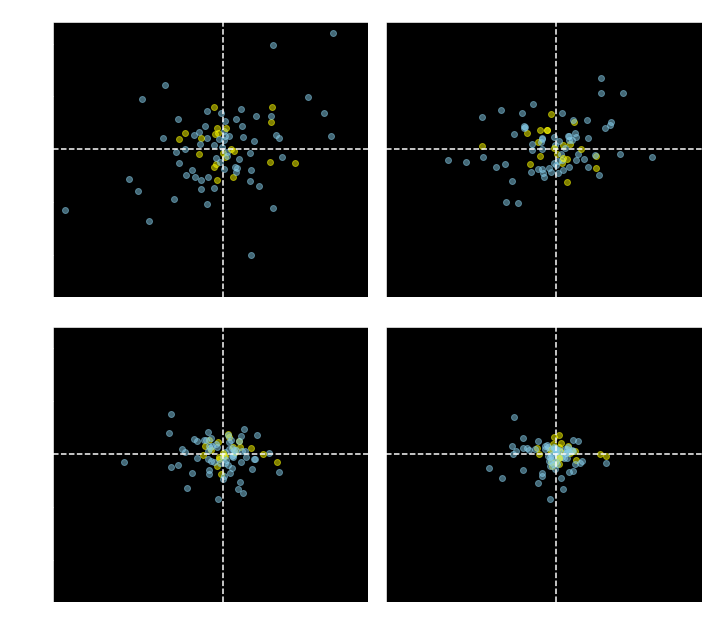

In [150]:
plt.figure(figsize=(10,9))
j = 0
times = [0, 1, 10, 60]
for i in [0, 6, 10, 14]:
    j += 1
    plt.subplot(2, 2, j)
    plt.title(str(times[j-1]) + ' sec')
    for fileNumber in allFits.index:
        c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'skyblue'
        plt.plot(allFits['g1_a'].loc[fileNumber][i], allFits['g2_a'].loc[fileNumber][i], 'o', alpha=0.5, color=c)

    if j in [1, 3]:
        plt.ylabel('g2')
    else:
        plt.yticks([])
    if j in [3, 4]:
        plt.xlabel('g1')
    else:
        plt.xticks([])
    plt.ylim([-.28,.24])
    plt.xlim([-.28,.24])
    plt.axhline(0, linestyle='--', color='w')
    plt.axvline(0, linestyle='--', color='w')
plt.tight_layout()
plt.show()

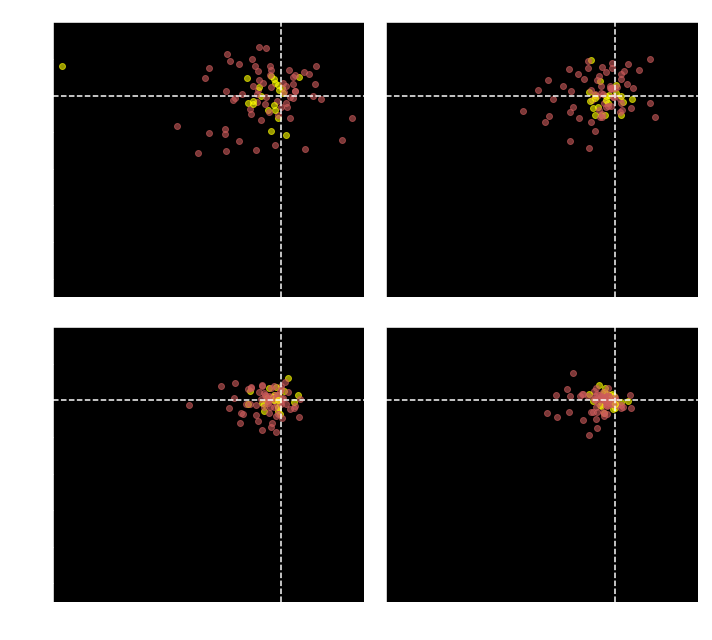

In [160]:
plt.figure(figsize=(10,9))
j = 0
for i in [0, 6, 10, 14]:
    j += 1
    plt.subplot(2, 2, j)
    plt.title(str(times[j-1]) + ' sec')
    for fileNumber in allFits.index:
        c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'indianred'
        plt.plot(allFits['g1_b'].loc[fileNumber][i], allFits['g2_b'].loc[fileNumber][i], 'o', alpha=0.6, color=c)

    if j in [1, 3]:
        plt.ylabel('g2')
    else:
        plt.yticks([])
    if j in [3, 4]:
        plt.xlabel('g1')
    else:
        plt.xticks([])
#     plt.xlim([-.3,.2])
#     plt.ylim([-.3,.2])
    plt.ylim([-.55,.2])
    plt.xlim([-.55,.2])
    plt.axhline(0, linestyle='--', color='w')
    plt.axvline(0, linestyle='--', color='w')
plt.tight_layout()
plt.show()

### HLR

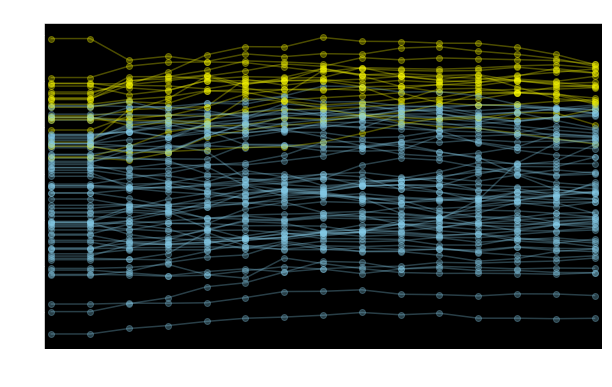

In [155]:
plt.figure(figsize=(10,6))
pts = np.logspace(-1.22,1.79,15)

for fileNumber in allFits.index:
    c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'skyblue'    
    plt.plot(pts, allFits['hlr_a'].loc[fileNumber], 'o-', alpha=0.3, color=c)

plt.xlabel('exposure time')
plt.ylabel('HLR [arcsec]')
plt.title('filter a: 692 nm')
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.show()

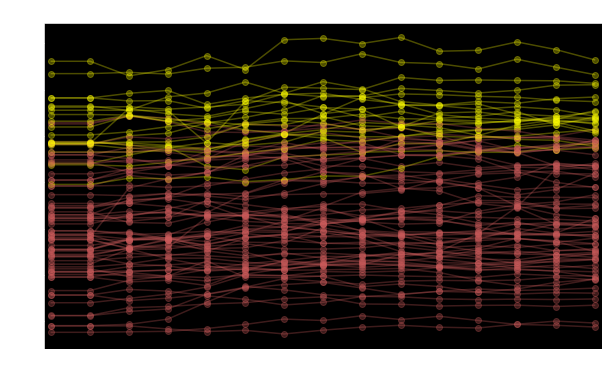

In [156]:
plt.figure(figsize=(10,6))
pts = np.logspace(-1.22,1.79,15)

for fileNumber in allFits.index:
    c = 'yellow' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'indianred'
    plt.plot(pts, allFits['hlr_b'].loc[fileNumber], 'o-', alpha=0.3, color=c)

# plt.axhline(0, linestyle='--', color='w')
plt.xlabel('exposure time')
plt.ylabel('HLR [arcsec]')
plt.title('filter b: 692 nm')
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.show()

#### HLR ratio

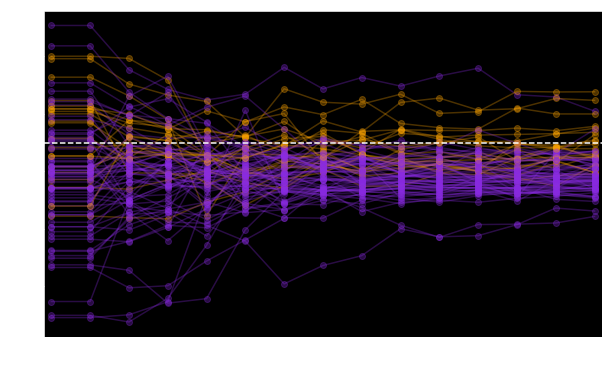

In [157]:
plt.figure(figsize=(10,6))
pts = np.logspace(-1.22,1.79,15)

for fileNumber in allFits.index:
    c = 'orange' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'blueviolet'    
    plt.plot(pts, allFits['hlr_b'].loc[fileNumber] / allFits['hlr_a'].loc[fileNumber], 'o-', alpha=0.3, color=c)

plt.axhline(.95, linestyle='--', color='w')
plt.xlabel('exposure time')
plt.ylabel('HLR ratio b:a')
plt.xscale('log')
plt.xlim((0.055,.068*1000))
plt.xticks([.06, 1, 10, 60],[.06, 1, 10, 60])
plt.show()